## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II
# Micro-Proyecto 2

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

A continuación escriba los nombres de los integrantes del grupo.

### Nombres:     
    Arturo Guerrero            (201823464)
    Carlos Andres Paez Rojas   (201924257)
    Luis Jorge García C        (201920053)
    Fernando Pérez Moreno      (200222809)

### Introducción
Una aplicación de música quiere actualizar su aplicación online para que genere recomendaciones a sus usuarios de nuevos artistas para escuchar. El sistema de recomendación debe tomar en cuenta las preferencias de cada usuario, con el fin de ofrecer recomendaciones automáticas y personalizadas.

La base de datos que va a trabajar se ha tomado de http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html


### Enunciado 1
Por ello se le pide a usted, en calidad de consultor externo, desarrollar un algoritmo de recomendación de artistas para cada usuario. Implemente el algoritmo a partir del conjunto de datos: "lastfm-dataset-360K/usersha1-profile.tsv" y evalúe su desempeño con respecto a la métrica apropiada.

### Enunciado 2
Una vez a desarrollado su primer sistema de recomendación, intente mejorarlo con respecto a la métrica de su elección, considerando además la información que encuentra en "lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv", donde encuentra información de tipo socio-demográfico por usuario.

Veamos los datos con los que vamos a trabajar:

In [1]:
import pandas
import tarfile

Importamos y descomprimimos los datos:

In [ ]:
tf = tarfile.open("lastfm-dataset-360K.tar.gz")
tf.extractall()

Veamos los archivos que hemos importado:

In [ ]:
tf.getmembers()

Veamos el archivo con la informacion de los usuarios y sus artistas preferidos. Esta base de datos nos dice cuantas veces un usuario a escuchado a un artista.

In [2]:
# leemos el archivo con columnas user/artist/plays
data = pandas.read_table("lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv", 
                         usecols=[0, 2, 3], 
                         names=['user', 'artist', 'plays'])

# map each artist and user to a unique numeric value
data['user'] = data['user'].astype("category")
data['artist'] = data['artist'].astype("category")


In [3]:
data.head(10)

,user,artist,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


También podemos ver informacion social/demográfica sobre los usuarios:

In [12]:
# leemos el archivo con columnas user/gender/age/country
dataP = pandas.read_table("lastfm-dataset-360K/usersha1-profile.tsv", 
                         usecols=[0, 1, 2, 3], 
                         names=['user', 'gender', 'age', 'country'])


In [7]:
dataP.head(10)

,user,gender,age,country
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States
5,0000c176103e538d5c9828e695fed4f7ae42dd01,m,20.0,United Kingdom
6,0000ee7dd906373efa37f4e1185bfe1e3f8695ae,m,17.0,Finland
7,0000ef373bbd0d89ce796abae961f2705e8c1faf,f,22.0,Poland
8,0000f687d4fe9c1ed49620fbc5ed5b0d7798ea20,f,24.0,Spain
9,0001399387da41d557219578fb08b12afa25ab67,m,NaN,Ukraine


----

## Exploración de datos

In [4]:
import pandas as pd
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535655 entries, 0 to 17535654
Data columns (total 3 columns):
 #   Column  Dtype   
---  ------  -----   
 0   user    category
 1   artist  category
 2   plays   int64   
dtypes: category(2), int64(1)
memory usage: 292.5 MB


#### Reproducciones por usuario

In [6]:
df1 = pd.DataFrame(data['plays'].groupby(data['user']).sum())
df1 = df1.sort_values('plays', ascending = False)
df1.describe(include='all')

,plays
count,358868.000000
mean,10515.156066
std,14761.252419
min,1.000000
25%,2402.000000
50%,6140.000000
75%,13131.000000
max,787884.000000


#### Reproducciones por artista

In [7]:
df2 = pd.DataFrame(data['plays'].groupby(data['artist']).sum())
df2 = df2.sort_values('plays', ascending = False)
df2.describe(include='all')

,plays
count,2.923630e+05
mean,1.290702e+04
std,1.859816e+05
min,1.000000e+00
25%,5.300000e+01
50%,2.080000e+02
75%,1.048000e+03
max,3.046683e+07


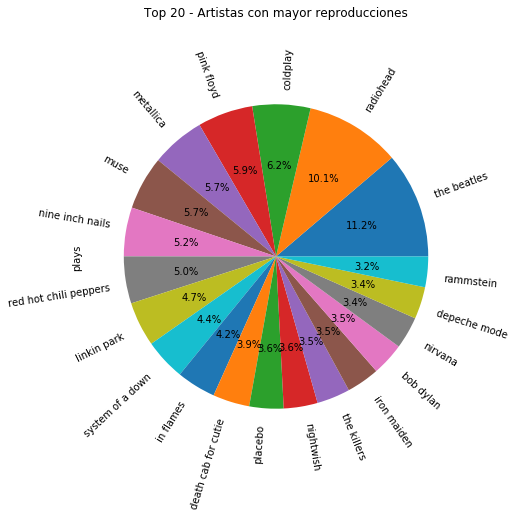

In [8]:
gr = df2.head(20)
gr.plot.pie(y = 'plays', figsize = (7, 7), legend = False, autopct = '%1.1f%%', rotatelabels = True)
plt.title('Top 20 - Artistas con mayor reproducciones', pad = 50)
plt.show()

#### Cantidad de usuarios por artista

In [9]:
df3 = pd.DataFrame(data[['user', 'artist']])
df3.drop_duplicates()
df3 = pd.DataFrame(data['user'].groupby(data['artist']).count())
df3 = df3.sort_values('user', ascending = False)
df3.describe(include='all')

,user
count,292363.000000
mean,59.978352
std,672.472347
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,77254.000000


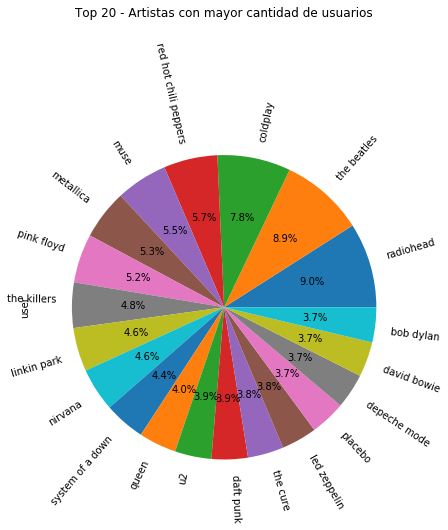

In [10]:
gr = df3.head(20)
gr.plot.pie(y = 'user', figsize = (7, 7), legend = False, autopct = '%1.1f%%', rotatelabels = True)
plt.title('Top 20 - Artistas con mayor cantidad de usuarios', pad = 100)
plt.show()

#### Análisis de información socio-demográfica por usuario

In [13]:
dataP.describe(include='all')

,user,gender,age,country
count,359347,326572,284447.000000,359347
unique,359347,2,NaN,239
top,25090a809eea2f68af8b2eab90c47cc509ee3ba2,m,NaN,United States
freq,1,241642,NaN,67044
mean,NaN,NaN,25.098046,NaN
std,NaN,NaN,21.665742,NaN
min,NaN,NaN,-1337.000000,NaN
25%,NaN,NaN,20.000000,NaN
50%,NaN,NaN,23.000000,NaN
75%,NaN,NaN,28.000000,NaN


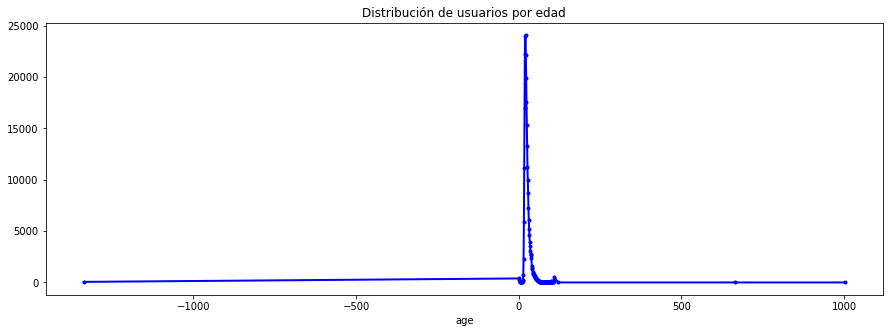

In [14]:
gr = dataP[['user', 'age']].groupby(['age']).count().plot(style = '.-', legend = False, color = 'blue', figsize = (15, 5), linewidth = 2, fontsize = 10)
plt.title('Distribución de usuarios por edad');

/Users/gerson.guerrero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


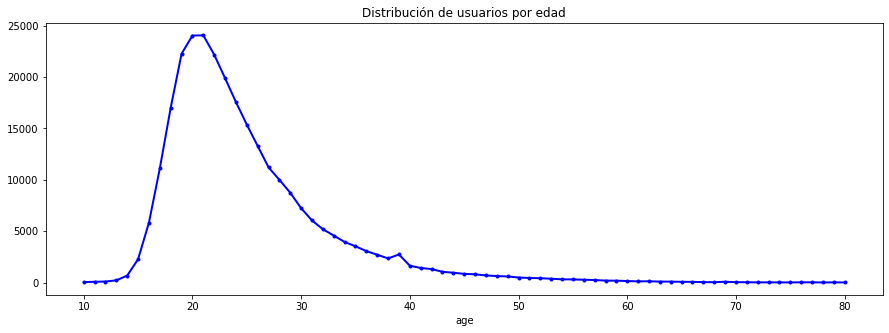

In [15]:
df4 = dataP[dataP['age'] >= 10]
df4 = df4[dataP['age'] <= 80]
gr = df4[['user', 'age']].groupby(['age']).count().plot(style = '.-', legend = False, color = 'blue', figsize = (15, 5), linewidth = 2, fontsize = 10)
plt.title('Distribución de usuarios por edad');

In [21]:
df4.describe(include='all')

,user,gender,age,country
count,281691,265311,281691.000000,281691
unique,281691,2,NaN,238
top,615840a8fe32a369e40ee9ea2ac93b5b5a4b5593,m,NaN,United States
freq,1,196431,NaN,51819
mean,NaN,NaN,25.020782,NaN
std,NaN,NaN,7.585912,NaN
min,NaN,NaN,10.000000,NaN
25%,NaN,NaN,20.000000,NaN
50%,NaN,NaN,23.000000,NaN
75%,NaN,NaN,28.000000,NaN


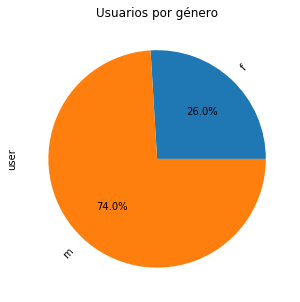

In [22]:
df5 = pd.DataFrame(df4[['user', 'gender']])
df5 = pd.DataFrame(df5['user'].groupby(df5['gender']).count())
df5.plot.pie(y = 'user', figsize = (5, 5), legend = False, autopct = '%1.1f%%', rotatelabels = True)
plt.title('Usuarios por género')
plt.show()

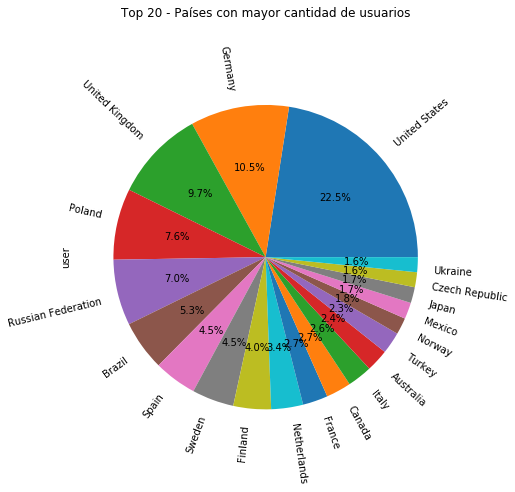

In [23]:
df6 = pd.DataFrame(df4['user'].groupby(dataP['country']).count())
df6 = df6.sort_values('user', ascending = False)
gr = df6.head(20)
gr.plot.pie(y = 'user', figsize = (7, 7), legend = False, autopct = '%1.1f%%', rotatelabels = True)
plt.title('Top 20 - Países con mayor cantidad de usuarios', pad = 50)
plt.show()

-----

In [16]:
data_Original = data
dataP_Original = dataP

In [17]:
data_usuarios = data[['user']].drop_duplicates()
data_todo = data_usuarios.merge(df4, how='inner', left_on='user', right_on='user', copy=True).drop_duplicates()
data_todo = data_todo.merge(data, how='inner', left_on='user', right_on='user', copy=True).drop_duplicates()

-----

In [18]:
pre_master = data
pre_master["user_id"] = pre_master.user.cat.codes
pre_master["artist_id"] = pre_master.artist.cat.codes
pre_master.dropna(inplace=True)

In [19]:
users_tab = pd.pivot_table(pre_master, index="user_id",  values=["plays", "artist"], aggfunc=["count", np.sum]).reset_index()
tab_users = pd.DataFrame()
tab_users["user_id"] = users_tab["user_id"]
tab_users["q_interactions"] = users_tab["count"]["artist"]
tab_users["q_plays"] = users_tab["sum"]["plays"]

In [20]:
users_top = tab_users.sort_values(by = "q_plays", ascending=False).head(10)
users_top

,user_id,q_interactions,q_plays
20683,20683,56,787884
197515,197515,48,568011
158172,158172,58,539942
339897,339897,48,474080
205446,205446,50,461744
105511,105511,42,436498
258340,258340,50,428354
270433,270433,50,420950
13745,13745,48,391406
275989,275989,53,389855


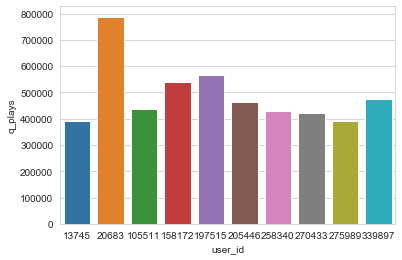

In [29]:
import seaborn as sns
sns.set_style(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="user_id", y="q_plays", data=users_top, orient="v")

In [30]:
print(f"Existen {users_tab.shape[0]} usuarios únicos")

Existen 358868 usuarios únicos


In [25]:
artists_tab = pd.pivot_table(pre_master, index="artist_id",  values=["plays", "user_id"], aggfunc=["count", np.sum]).reset_index()
tab_artists = pd.DataFrame()
tab_artists["artist_id"] = artists_tab["artist_id"]
tab_artists["q_interactions"] = artists_tab["count"]["user_id"]
tab_artists["q_plays"] = artists_tab["sum"]["plays"]

In [32]:
artists_tab.sample(5)

artist_id count             sum             
                 plays user_id   plays      user_id
128637    128637     4       4     277     574650.0
82123      82123     1       1       4     350499.0
272724    272724   854     854  154136  151434561.0
103015    103015     5       5     188     847287.0
150824    150824     2       2     127     443038.0

In [33]:
tab_artists[tab_artists.q_interactions > 10]["artist_id"].values

array([    20,     37,     45, ..., 292273, 292299, 292318])

In [34]:
artists_top = tab_artists.sort_values(by = "q_plays", ascending=False).head(20)
artists_top

,artist_id,q_interactions,q_plays
252494,252494,76245,30466827
217883,217883,77254,27426234
73856,73856,66658,16686772
212496,212496,44443,15943557
186241,186241,45233,15481852
194163,194163,46954,15451683
199674,199674,28946,14075619
220128,220128,48924,13547741
171169,171169,39773,12836638
247942,247942,37267,11917336


-----

## Modelo: Filtro Colaborativo con interacción implicita.

In [21]:
import random

In [8]:
def split_base(interactions_mat, pct_val = 0.2):
    '''
    Input: Matriz de ratings
    Output: matriz de entrenamiento CE y de validacion CV, y user_inds
    
    Esta función toma la matriz orginal y enmascara un porcentaje de ratings pata la validacion
    El conjunto de validacion (CV) va a tener todos los ratings originales, mientras que el de entrenamiento (CE)
    reemplaza el porcentaje señalado con ceros
    
    pct_val: porcentaje de iteraciones a enmascarar
    user_inds: lista de usuarios aleatoriamente elegidos y enmascarados en CE.
    '''
    
    random.seed(0) # Semilla aeatoria
    
    CV = interactions_mat.copy() 
    CV[CV != 0] = 1 # CV como una matriz binaria
    
    CE = interactions_mat.copy() 
    non0_inds = CE.nonzero() # Indices donde hay interaccion
    non0_pares = list(zip(non0_inds[0], non0_inds[1])) # lista de indices usuario-item con interaccion
    
    num_muestra = int(np.ceil(pct_val*len(non0_pares))) 
    muestra = random.sample(non0_pares, num_muestra) # sub-muestreo sin reemplazo
    
    user_inds = [index[0] for index in muestra] # indices de usuario
    item_inds = [index[1] for index in muestra] # inidices de items
    
    CE[user_inds, item_inds] = 0 # Asigna 0 sobre las observaciones elegidas
    CE.eliminate_zeros() # Elimina los ceros en el arreglo sparce
    return CE, CV, list(set(user_inds))

In [23]:
master = pre_master[["user_id", "artist_id", "plays"]]

Filtrando por los usuarios que han tenido mas de 35 interacciones, y los artistas que han tenido mas de 30 reproducciones en toda la base.

In [26]:
master = master[master.user_id.isin(list(tab_users[tab_users.q_interactions > 35]["user_id"].values))]
master = master[master.artist_id.isin(list(tab_artists[tab_artists.q_interactions > 30]["artist_id"].values))]

In [27]:
master = pd.pivot_table(master, index = ["user_id", "artist_id"], values="plays" , aggfunc=np.sum)
master = master.reset_index()

In [28]:
#export master data
import pickle
filehandler = open("./master.data", "wb")
pickle.dump(master, filehandler)

In [29]:
#export artists data
artists_handler = open("./artists.data", "wb")
pickle.dump(tab_artists, artists_handler)

#export users data
users_handler = open("./users.data", "wb")
pickle.dump(tab_users, users_handler)

In [30]:
#export conversion data
pre_master_handler = open("./premaster.data", "wb")
pickle.dump(pre_master, pre_master_handler)

In [3]:
#import master data
import pickle
import pandas as pd
import numpy as np
import scipy.sparse as sparse
import random
filename = "./master.data"
filehandler = open(filename, 'rb') 
master_loaded = pickle.load(filehandler)

In [4]:
master_dense = master_loaded
master_dense.shape

(16079298, 3)

In [5]:
master_dense.sample(5)

,user_id,artist_id,plays
7986814,178136,181658,165
9153053,204170,67139,308
7767065,173209,283411,290
15121998,337442,114051,109
16066680,358580,238667,567


In [5]:
users = list(np.sort(master_dense.user_id.unique())) 
artists = list(master_dense.artist_id.unique()) 
interaction = list(master_dense.plays)

# Construimos la matriz
rows = master_dense.user_id.astype('category').cat.codes
cols = master_dense.artist_id.astype('category').cat.codes
prefs_sparse = sparse.csr_matrix((interaction, (rows, cols)), shape=(len(users), len(artists)))

In [12]:
prefs_sparse

<341425x35443 sparse matrix of type '<class 'numpy.longlong'>'
	with 16079298 stored elements in Compressed Sparse Row format>

In [6]:
# Interacciones posibles
mat_dim = prefs_sparse.shape[0]*prefs_sparse.shape[1] 

# Numero de interacciones
num_interactions = len(prefs_sparse.nonzero()[0]) 
sparsity = 100*(1 - (num_interactions/mat_dim))
sparsity

99.86712560769473

Se obtiene una matriz dispersa con 99.86 datos nulos

In [9]:
CE, CV, users_V = split_base(prefs_sparse, pct_val = 0.2)

In [10]:
import implicit
from sklearn import metrics

In [14]:
alpha = 15
user_vecs, item_vecs = implicit.alternating_least_squares((CE*alpha).astype('double'), 
                                                          factors=20, 
                                                          regularization = 0.1, 
                                                          iterations = 50)

In [48]:
def auc_score(preds, prueba):
    '''
    Esta funcion obtiene el AUC. 
    Input:
    parameters:
    preds: las predicciones del sistema
    prueba: las ventas verdaderas
    Output:
    AUC
    '''
    
    fpr, tpr, umbrales = metrics.roc_curve(prueba, preds)
    return metrics.auc(fpr, tpr)   

In [72]:
def AUC_val(CE, users_V, preds, CV):
    '''
    Esta funcion calcula el AUC medio por usuario para todo usuario en el conjunto de validacion
    Input:
    CE: Conjunto de entrenamiento con un porcentaje de las interacciones originales enmascaradas
    preds: la matriz con las predicciones de los ratings para cada par usuario-item (lista
    con vectores de usuario y vectores de items)
    users_V: indices de los usuarios de validacion
    CV: conjunto de validacion 
    Output:
    AUC medio del CV para las interacciones usuario-item y para los items más populares
    '''
    
    # Inicializamos la lista para guardar el AUC de validacion 
    rec_auc = [] 
    # y el AUC para la recomendación por popularidad
    pop_auc = [] 
    
    # Tomamos la suma de interacciones por item para encontrar lo más popular
    pop_items = np.array(CV.sum(axis = 0)).reshape(-1)
    item_vecs = preds[1]
    
    for user in users_V: 
        user_i = CE[user,:].toarray().reshape(-1) # usuario de validacion
        user_val = np.where(user_i == 0) # 
        
        # Toma la prediccion para el usuario-item
        user_vec = preds[0][user,:]
        pred = user_vec.dot(item_vecs).toarray()[0,user_val].reshape(-1)
        
        # Selecciona los ratings estimados para el usuario 
        actual = CV[user,:].toarray()[0,user_val].reshape(-1)
        
        # Toma los pares con interacciones binarias de los datos originales
        pop = pop_items[user_val] # Popularidad del item
        rec_auc.append(auc_score(pred, actual)) # Calcula y guarda el AUC para el ususario
        pop_auc.append(auc_score(pop, actual)) # Calcula el AUC por popularidad

    
    return float('%.3f'%np.mean(rec_auc)), float('%.3f'%np.mean(pop_auc))  
   # Devuelve el AUC medio para validacion y por popularidad


In [55]:
AUC_val(CE, users_V, [sparse.csr_matrix(user_vecs), sparse.csr_matrix(item_vecs.T)], CV)

(0.975, 0.89)

Donde 0.975 representa el AUC promedio de recomendación sobre el set de datos de validación, y 0.89 representa el AUC de un modelo con predicciones por popularidad.

Making a prediction

In [24]:
def prediction(CE, CV, users_mat, items_mat, users_V):
    """
    Esta funcion calcula el AUC medio por usuario para todo usuario en el conjunto de validacion
    Input:
    CE: Conjunto de entrenamiento con un porcentaje de las interacciones originales enmascaradas
    preds: la matriz con las predicciones de los ratings para cada par usuario-item (lista
    con vectores de usuario y vectores de items)
    users_V: indices de los usuarios de validacion
    CV: conjunto de validacion 
    """
    concat_ret = []
    for user in users_V: 
        user_i = CE[user,:].toarray().reshape(-1) # usuario de validacion
        user_val = np.where(user_i == 0) # 
        
        # Toma la prediccion para el usuario-item
        user_vec = users_mat[user,:]
        pred = user_vec.dot(items_mat).toarray()[0,user_val].reshape(-1)
        
        # Selecciona los ratings estimados para el usuario 
        actual = CV[user,:].toarray()[0,user_val].reshape(-1)
        concat_ret.append([user, actual, pred])
    return concat_ret


In [ ]:
predictions = predict(CE, CV, sparse.csr_matrix(user_vecs), sparse.csr_matrix(item_vecs.T), users_V)

In [12]:
def predict(user, CE, CV, users_V, users_mat, items_mat):
    user_i = CE[user,:].toarray().reshape(-1) # usuario de validacion
    user_val = np.where(user_i == 0) # 
    user_vec = users_mat[user,:]
    pred = user_vec.dot(items_mat).toarray()[0,user_val].reshape(-1)
    return pred

In [17]:
user = random.choice(users_V)
prediction = predict(user, CE, CV, users_V, sparse.csr_matrix(user_vecs), sparse.csr_matrix(item_vecs.T))
print(f"User: {user} prediction")

User: 312930 prediction


In [21]:
prediction

array([ 0.53476465, -0.00313634,  0.30817783, ..., -0.13072668,
       -0.04748308, -0.00593788], dtype=float32)

## Modelo híbrido

In [68]:
from lightfm.data import Dataset
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
from lightfm.cross_validation import random_train_test_split
from scipy.sparse import coo_matrix as sp

C:\Users\Fernando\Anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:10: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  "LightFM was compiled without OpenMP support. "


PAra mejorar el performance con la información auxiliar, se hará un rankeo de la variable edad, según su densidad; esta categorización facilitará la estimación del modelo.

### SR híbrido para los datos sin filtrar

In [113]:
dataP['age_r'] = pd.qcut(dataP['age'], 5, labels=False)

In [114]:
dataP.head()

,user,gender,age,country,age_r
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,1.0
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,NaN
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,NaN
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,0.0
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,3.0


In [115]:
dataP.groupby('age_r').agg({'age': ['count','mean', 'min', 'max']})

age                           
       count       mean     min     max
age_r                                  
0.0    60809  16.244207 -1337.0    19.0
1.0    70268  20.973530    20.0    22.0
2.0    52827  23.914419    23.0    25.0
3.0    50476  27.710833    26.0    30.0
4.0    50067  40.254918    31.0  1002.0

In [116]:
dataset = Dataset()

In [117]:
dfx = pd.DataFrame(users)
dfx.shape

(341425, 1)

In [118]:
dfx = pd.DataFrame(artists)
dfx.shape

(35443, 1)

In [119]:
dataP.to_numpy()[0][0]

'00000c289a1829a808ac09c00daf10bc3c4e223b'

In [120]:
dataset.fit(users=users,
            items=artists,
           )

In [121]:
num_users, num_items = dataset.interactions_shape()
num_users, num_items
#(358868, 292363)

(341425, 35443)

In [122]:
(interactions_sparse_matrix, weights) = dataset.build_interactions(
        (
            (
                row[0]
                ,row[1]
                ,row[2]
            )
        )
        for row in master_dense.to_numpy()
    )

In [123]:
customer_Features = dataP[['user','gender','age_r','country']].drop_duplicates().fillna(0)
customer_Features=customer_Features[(customer_Features.groupby(['user']).cumcount() == 0)]

In [124]:
customer_Features.fillna('NA', inplace=True)

In [125]:
customer_Features

,user,gender,age_r,country
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,1.0,Germany
1,00001411dc427966b17297bf4d69e7e193135d89,f,0.0,Canada
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,0,0.0,Germany
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,0.0,Mexico
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,3.0,United States
...,...,...,...,...
359342,fffe7823f67b433b45f22056467db921c1d3d7d0,m,2.0,Germany
359343,fffe8637bd8234309e871409c7ebef99a720afc1,m,2.0,Brazil
359344,fffe8c7f952d9b960a56ed4dcb40a415d924b224,m,1.0,United States
359345,ffff9af9ae04d263dae91cb838b1f3a6725f5ffb,m,1.0,Russian Federation


In [126]:
customer_Features[customer_Features['country']==0]

,user,gender,age_r,country


In [127]:
C_age = customer_Features[['age_r']].drop_duplicates()
C_genero = customer_Features[['gender']].drop_duplicates()
C_country = customer_Features[['country']].drop_duplicates()

In [128]:
C_country[C_country['country']=='NA']

,country


In [129]:
C_age2 = C_age.to_numpy().reshape(len(C_age.to_numpy()))
C_genero2 = C_genero.to_numpy().reshape(len(C_genero.to_numpy()))
C_country2 = C_country.to_numpy().reshape(len(C_country.to_numpy()))
customers_F = list(C_age2) + list(C_genero2) +  list(C_country2) + ['NA']

In [130]:
customers_F[0:20]

[1.0,
 0.0,
 3.0,
 2.0,
 4.0,
 'f',
 0,
 'm',
 'Germany',
 'Canada',
 'Mexico',
 'United States',
 'United Kingdom',
 'Finland',
 'Poland',
 'Spain',
 'Ukraine',
 'Sweden',
 'Japan',
 'Australia']

In [131]:
Usuarios = pre_master[['user','user_id']].drop_duplicates()
Usuarios2 = Usuarios.merge(customer_Features, how='left', left_on='user', right_on='user', copy=True).drop_duplicates()

In [132]:
Usuarios2.fillna('NA', inplace=True)

In [133]:
Usuarios2.to_numpy()

array([['00000c289a1829a808ac09c00daf10bc3c4e223b', 0, 'f', 1.0,
        'Germany'],
       ['00001411dc427966b17297bf4d69e7e193135d89', 1, 'f', 0.0,
        'Canada'],
       ['00004d2ac9316e22dc007ab2243d6fcb239e707d', 2, 0, 0.0, 'Germany'],
       ...,
       ['ffff9af9ae04d263dae91cb838b1f3a6725f5ffb', 358865, 'm', 1.0,
        'Russian Federation'],
       ['ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac', 358866, 'm', 1.0,
        'Belgium'],
       ['sep 20, 2008', 358867, 'NA', 'NA', 'NA']], dtype=object)

In [134]:
users = list(np.sort(Usuarios2.user_id.unique())) 

In [135]:
dataset.fit_partial(
    users=users,
    user_features=customers_F
    )

In [136]:
customer_Features

,user,gender,age_r,country
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,1.0,Germany
1,00001411dc427966b17297bf4d69e7e193135d89,f,0.0,Canada
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,0,0.0,Germany
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,0.0,Mexico
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,3.0,United States
...,...,...,...,...
359342,fffe7823f67b433b45f22056467db921c1d3d7d0,m,2.0,Germany
359343,fffe8637bd8234309e871409c7ebef99a720afc1,m,2.0,Brazil
359344,fffe8c7f952d9b960a56ed4dcb40a415d924b224,m,1.0,United States
359345,ffff9af9ae04d263dae91cb838b1f3a6725f5ffb,m,1.0,Russian Federation


In [137]:
user_features = dataset.build_user_features(
    ((x[1], (x[2],x[3],x[4]))
   for x in Usuarios2.to_numpy())
   )

In [138]:
train, test, users_V = split_base(interactions_sparse_matrix.tocsr(), pct_val = 0.2)

In [139]:
interactions_sparse_matrix

<341425x35443 sparse matrix of type '<class 'numpy.int32'>'
	with 16079298 stored elements in COOrdinate format>

In [140]:
no_comp, lr, ep = 20, 0.01, 20
model = LightFM(no_components=no_comp, learning_rate=lr, loss='warp')

In [141]:
model.fit_partial(
        train,
        user_features=user_features,
        epochs=ep,
        num_threads=4,
        verbose=True)

Epoch: 100%|██████████| 20/20 [46:45<00:00, 140.27s/it]


In [87]:
from lightfm.evaluation import precision_at_k

In [143]:
print("Train precision: %.2f" % precision_at_k(model, train,user_features=user_features, k=10).mean())

Train precision: 0.14


In [144]:
print("Test precision: %.2f" % precision_at_k(model, test,user_features=user_features, k=10).mean())

Test precision: 0.18


In [88]:
from lightfm.evaluation import auc_score

In [146]:
train_auc = auc_score(model, train,user_features=user_features).mean()
test_auc = auc_score(model, test,user_features=user_features).mean()

In [147]:
train_auc #0.9332487 -> 0.94575834

0.9170196

In [148]:
test_auc

0.9166661

-----

#### SR híbrido con datos filtrados

In [140]:
data = data_todo[['user', 'artist', 'plays']].drop_duplicates()
dataP = data_todo[['user', 'gender', 'age', 'country']].drop_duplicates()

In [141]:
data['user'] = data['user'].astype("category")
data['artist'] = data['artist'].astype("category")

-----

In [142]:
pre_master = data
pre_master["user_id"] = pre_master.user.cat.codes
pre_master["artist_id"] = pre_master.artist.cat.codes
pre_master.dropna(inplace=True)

In [143]:
users_tab = pd.pivot_table(pre_master, index="user_id",  values=["plays", "artist"], aggfunc=["count", np.sum]).reset_index()
tab_users = pd.DataFrame()
tab_users["user_id"] = users_tab["user_id"]
tab_users["q_interactions"] = users_tab["count"]["artist"]
tab_users["q_plays"] = users_tab["sum"]["plays"]

In [144]:
print(f"Existen {users_tab.shape[0]} usuarios únicos")

Existen 281323 usuarios únicos


In [145]:
artists_tab = pd.pivot_table(pre_master, index="artist_id",  values=["plays", "user_id"], aggfunc=["count", np.sum]).reset_index()
tab_artists = pd.DataFrame()
tab_artists["artist_id"] = artists_tab["artist_id"]
tab_artists["q_interactions"] = artists_tab["count"]["user_id"]
tab_artists["q_plays"] = artists_tab["sum"]["plays"]

In [146]:
tab_artists[tab_artists.q_interactions > 10]["artist_id"].values

array([    20,     37,     45, ..., 292268, 292299, 292318], dtype=int64)

In [147]:
master = pre_master[["user_id", "artist_id", "plays"]]

In [148]:
master = master[master.user_id.isin(list(tab_users[tab_users.q_interactions > 35]["user_id"].values))]
master = master[master.artist_id.isin(list(tab_artists[tab_artists.q_interactions > 30]["artist_id"].values))]

In [149]:
master = pd.pivot_table(master, index = ["user_id", "artist_id"], values="plays" , aggfunc=np.sum)
master = master.reset_index()

In [150]:
!ls

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [151]:
#export master data
import pickle
filehandler = open("./master.data", "wb")
pickle.dump(master, filehandler)

In [152]:
#export artists data
artists_handler = open("./artists.data", "wb")
pickle.dump(tab_artists, artists_handler)

#export users data
users_handler = open("./users.data", "wb")
pickle.dump(tab_users, users_handler)

In [153]:
#export conversion data
pre_master_handler = open("./premaster.data", "wb")
pickle.dump(pre_master, pre_master_handler)

In [154]:
#import master data
filename = "./master.data"
filehandler = open(filename, 'rb') 
master_loaded = pickle.load(filehandler)

In [155]:
master_dense = master_loaded
master_dense.shape

(12530443, 3)

In [156]:
users = list(np.sort(master_dense.user_id.unique())) 
artists = list(master_dense.artist_id.unique()) 
interaction = list(master_dense.plays)

# Construimos la matriz
rows = master_dense.user_id.astype('category').cat.codes
cols = master_dense.artist_id.astype('category').cat.codes
prefs_sparse = sparse.csr_matrix((interaction, (rows, cols)), shape=(len(users), len(artists)))

In [157]:
prefs_sparse

<268331x30067 sparse matrix of type '<class 'numpy.int32'>'
	with 12530443 stored elements in Compressed Sparse Row format>

In [65]:
dataP['age_r'] = pd.qcut(dataP['age'], 5, labels=False)

In [66]:
dataP.groupby('age_r').agg({'age': ['count','mean', 'min', 'max']})

age                       
       count       mean   min   max
age_r                              
0      59573  17.787236  10.0  19.0
1      70152  20.973771  20.0  22.0
2      52760  23.914310  23.0  25.0
3      43187  27.327853  26.0  29.0
4      55651  37.123664  30.0  80.0

In [69]:
dataset = Dataset()

In [70]:
dataP.to_numpy()[0][0]

'00000c289a1829a808ac09c00daf10bc3c4e223b'

In [71]:
dataset.fit(users=users,
            items=artists,
           )

In [72]:
num_users, num_items = dataset.interactions_shape()
num_users, num_items

(268331, 30067)

In [73]:
(interactions_sparse_matrix, weights) = dataset.build_interactions(
        (
            (
                row[0]
                ,row[1]
                ,row[2]
            )
        )
        for row in master_dense.to_numpy()
    )

In [74]:
customer_Features = dataP[['user','gender','age_r','country']].drop_duplicates().fillna(0)
customer_Features=customer_Features[(customer_Features.groupby(['user']).cumcount() == 0)]

In [75]:
customer_Features.fillna('NA', inplace=True)

In [76]:
customer_Features[customer_Features['country']==0]

,user,gender,age_r,country


In [77]:
C_age = customer_Features[['age_r']].drop_duplicates()
C_genero = customer_Features[['gender']].drop_duplicates()
C_country = customer_Features[['country']].drop_duplicates()


In [78]:
C_country[C_country['country']=='NA']

,country


In [79]:
C_age2 = C_age.to_numpy().reshape(len(C_age.to_numpy()))
C_genero2 = C_genero.to_numpy().reshape(len(C_genero.to_numpy()))
C_country2 = C_country.to_numpy().reshape(len(C_country.to_numpy()))
customers_F = list(C_age2) + list(C_genero2) +  list(C_country2) + ['NA']

In [80]:
Usuarios = pre_master[['user','user_id']].drop_duplicates()
Usuarios2 = Usuarios.merge(customer_Features, how='left', left_on='user', right_on='user', copy=True).drop_duplicates()

In [81]:
Usuarios2.fillna('NA', inplace=True)
Usuarios2.to_numpy()

array([['00000c289a1829a808ac09c00daf10bc3c4e223b', 0, 'f', 1, 'Germany'],
       ['000063d3fe1cf2ba248b9e3c3f0334845a27a6bf', 1, 'm', 0, 'Mexico'],
       ['00007a47085b9aab8af55f52ec8846ac479ac4fe', 2, 'm', 3,
        'United States'],
       ...,
       ['fffe8c7f952d9b960a56ed4dcb40a415d924b224', 281320, 'm', 1,
        'United States'],
       ['ffff9af9ae04d263dae91cb838b1f3a6725f5ffb', 281321, 'm', 1,
        'Russian Federation'],
       ['ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac', 281322, 'm', 1,
        'Belgium']], dtype=object)

In [82]:
users = list(np.sort(Usuarios2.user_id.unique())) 

In [83]:
dataset.fit_partial(
    users=users,
    user_features=customers_F
    )

In [84]:
user_features = dataset.build_user_features(
    ((x[1], (x[2],x[3],x[4]))
   for x in Usuarios2.to_numpy())
   )

In [85]:
train, test, users_V = split_base(interactions_sparse_matrix.tocsr(), pct_val = 0.2)

In [86]:
interactions_sparse_matrix

<268331x30067 sparse matrix of type '<class 'numpy.int32'>'
	with 12530443 stored elements in COOrdinate format>

In [89]:
no_comp, lr, ep = 20, 0.01, 20
model = LightFM(no_components=no_comp, learning_rate=lr, loss='warp')

In [90]:
model.fit_partial(
        train,
        user_features=user_features,
        epochs=ep,
        num_threads=4,
        verbose=True)

Epoch: 100%|██████████| 20/20 [40:06<00:00, 120.33s/it]


In [91]:
print("Train precision: %.2f" % precision_at_k(model, train,user_features=user_features, k=10).mean())

Train precision: 0.15


In [92]:
print("Test precision: %.2f" % precision_at_k(model, test,user_features=user_features, k=10).mean())

Test precision: 0.19


In [93]:
train_auc = auc_score(model, train,user_features=user_features).mean()
test_auc = auc_score(model, test,user_features=user_features).mean()

In [94]:
train_auc

0.921785

In [95]:
test_auc

0.9213889

-----

In [151]:
Usuarios2 = Usuarios.merge(customer_Features, how='inner', left_on='user', right_on='user', copy=True).drop_duplicates()
Usuarios2.fillna('NA', inplace=True)
Usuarios2.to_numpy()

array([['00000c289a1829a808ac09c00daf10bc3c4e223b', 0, 'f', 1, 'Germany'],
       ['000063d3fe1cf2ba248b9e3c3f0334845a27a6bf', 3, 'm', 0, 'Mexico'],
       ['00007a47085b9aab8af55f52ec8846ac479ac4fe', 4, 'm', 3,
        'United States'],
       ...,
       ['fffe8c7f952d9b960a56ed4dcb40a415d924b224', 358864, 'm', 1,
        'United States'],
       ['ffff9af9ae04d263dae91cb838b1f3a6725f5ffb', 358865, 'm', 1,
        'Russian Federation'],
       ['ffff9ef87a7d9494ada2f9ade4b9ff637c0759ac', 358866, 'm', 1,
        'Belgium']], dtype=object)

Se encuentra luego, que el mejor modelo es el Híbrido con filrado, con un AUC de 0.9217 en el set de entrenamiento y de 0.9213 en el set de validación

## Estimación del impacto del SR híbrido

Se realizará una estimación sobre el potencial impacto que podría tener el sistema de recomendación híbrido para el ingreso de los artistas por reproducciones. Bajo los supuestos que se mencionan en el documento se encontró:

In [151]:
def top_k_recomendaciones(user_id, interactions, user_dict,item_dict, nrec_items=10 ):
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items), user_features=user_features))
    scores.index = item_id_map
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    known_items = list(pd.Series(np.squeeze(np.asarray(interactions.tocsr()[user_x].todense())))==1)
    known_items
    k_items = pd.DataFrame([*item_id_map])[known_items][0].tolist()


    scores = [x for x in scores if x not in k_items]
    return_score_list = scores[0:nrec_items]
    """
    print("\n Usuario:" + str(user_id))
    print("\n Artistas escuchados:")
    counter = 1
    for i in k_items:
        print(str(counter) + '- ' + str(i))
        counter+=1
    
    print("\n Artistas Recomendados:")
    counter = 1
    for i in return_score_list:
        print(str(counter) + '- ' + str(i))
        counter+=1
    """
    return k_items, return_score_list
    

In [152]:
user_id_map, user_feature_map, item_id_map, item_feature_map = dataset.mapping()
#user_feature_map
#item_feature_map

In [ ]:
Usuario = []
Recomendacion = []
for i in user_id_map.keys():
    print(i)
    Escuchados, Recomendation = top_k_recomendaciones(i,interactions_sparse_matrix,user_id_map,item_id_map,10)
    Usuario.append([i]*10)
    Recomendacion.append(Recomendation)

In [161]:
Resumen_Recom = pd.DataFrame({'Usuarios':np.array(Usuario).reshape(414010),'Recomendacion':np.array(Recomendacion).reshape(414010)})

In [162]:
Resumen_Recom

,Usuarios,Recomendacion
0,0,73856
1,0,258344
2,0,171169
3,0,252494
4,0,194163
...,...,...
414005,43506,190785
414006,43506,73856
414007,43506,54953
414008,43506,250324


In [163]:
Resumen_Recom_2=Resumen_Recom.merge(dic_artistas, how='left', left_on='Recomendacion', right_on='artist_id', copy=True).drop_duplicates()

In [187]:
Resumen_Recom_3=Resumen_Recom_2.groupby('artist').agg('count').reset_index().sort_values(by=['Usuarios'],ascending=False)

In [190]:
Resumen_Recom_3.head(20)

,artist,Usuarios,Recomendacion,artist_id
73856,coldplay,30879,30879,30879
217883,radiohead,26651,26651,26651
252494,the beatles,26117,26117,26117
220128,red hot chili peppers,20316,20316,20316
212496,pink floyd,18971,18971,18971
186241,metallica,16578,16578,16578
194163,muse,16181,16181,16181
247942,system of a down,11687,11687,11687
171169,linkin park,11213,11213,11213
258212,the killers,10572,10572,10572


In [197]:
def top_k_recomendaciones(user_id, interactions, user_dict,item_dict, nrec_items=10 ):
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items), user_features=user_features))
    scores.index = item_id_map
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    known_items = list(pd.Series(np.squeeze(np.asarray(interactions.tocsr()[user_x].todense())))==1)
    known_items
    k_items = pd.DataFrame([*item_id_map])[known_items][0].tolist()


    scores = [x for x in scores if x not in k_items]
    return_score_list = scores[0:nrec_items]
    
    k_items = pd.DataFrame({'items':k_items}).merge(dic_artistas, how='left', left_on='items', right_on='artist_id', copy=True).drop_duplicates()
    return_score_list = pd.DataFrame({'items':return_score_list}).merge(dic_artistas, how='left', left_on='items', right_on='artist_id', copy=True).drop_duplicates()
    
    print("\n Usuario:" + str(user_id))
    print("\n Artistas escuchados:")
    counter = 1
    for i in k_items.iloc[:,2]:
        print(str(counter) + '- ' + str(i))
        counter+=1
    
    print("\n Artistas Recomendados:")
    counter = 1
    for i in return_score_list.iloc[:,2]:
        print(str(counter) + '- ' + str(i))
        counter+=1
    
    return k_items, return_score_list

In [207]:
top_k_recomendaciones(7000,interactions_sparse_matrix,user_id_map,item_id_map,10)


 Usuario:7000

 Artistas escuchados:
1- die Ärzte
2- red hot chili peppers
3- coldplay
4- children of bodom
5- dimmu borgir
6- system of a down
7- snow patrol
8- bullet for my valentine
9- in flames
10- iron maiden
11- killswitch engage
12- slayer
13- trivium
14- blink-182
15- limp bizkit
16- linkin park
17- oasis
18- 3 doors down
19- fall out boy
20- lostprophets
21- moving mountains
22- disturbed
23- nickelback
24- rammstein
25- 30 seconds to mars
26- as i lay dying
27- finch
28- from first to last
29- scary kids scaring kids
30- koЯn
31- cradle of filth
32- fear factory
33- all that remains
34- in extremo
35- die toten hosen
36- staind
37- stone sour
38- slipknot
39- böhse onkelz
40- caliban
41- from autumn to ashes
42- 36 crazyfists
43- escape the fate
44- misery signals
45- soil
46- kettcar
47- i am ghost
48- eighteen visions
49- soulgate's dawn

 Artistas Recomendados:
1- metallica
2- beatsteaks
3- billy talent
4- deichkind
5- peter fox
6- foo fighters
7- die fantastischen vier


(     items  artist_id                   artist
 0    90933      90933                die Ärzte
 1   220128     220128    red hot chili peppers
 2    73856      73856                 coldplay
 3    68152      68152        children of bodom
 4    91565      91565             dimmu borgir
 5   247942     247942         system of a down
 6   238261     238261              snow patrol
 7    58491      58491  bullet for my valentine
 8   140703     140703                in flames
 9   142586     142586              iron maiden
 10  160833     160833        killswitch engage
 11  237274     237274                   slayer
 12  271016     271016                  trivium
 13   50265      50265                blink-182
 14  170944     170944              limp bizkit
 15  171169     171169              linkin park
 16  202328     202328                    oasis
 17    2902       2902             3 doors down
 18  112792     112792             fall out boy
 19  174074     174074             lostp